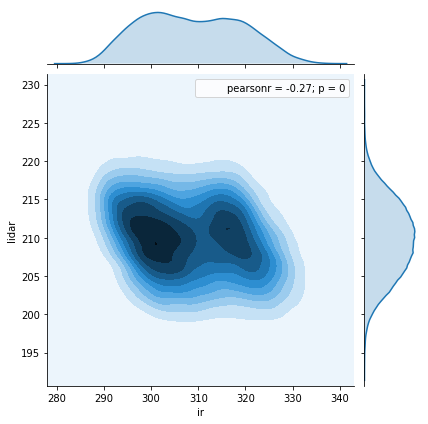

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

d = data.loc[:, ["ir", "lidar"]]

sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [3]:
d.loc[:, ["ir", "lidar"]].cov()

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


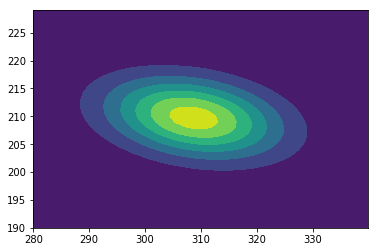

In [9]:
import numpy as np
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

x, y = np.mgrid[280:340:.1, 190:230:1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
plt.contourf(x, y, irlidar.pdf(pos))

plt.show()